# Import libraries and load data

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




# Data Loading and Preprocessing 

In [2]:
# Load CSV file (replace 'path_to_your_file.csv' with the actual file path)
csv_file_path = '/home/souvik/Documents/Code/Python/Machine-Learning-Lab/Dimention Reduction/Wholesale customers data.csv'  # e.g., 'C:/Users/YourName/Wholesale customers data.csv'
df = pd.read_csv(csv_file_path)

# Print column names
print("Available columns in the CSV:", df.columns.tolist())

# Extract numerical features and target
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
target_column = 'Channel'  # Using 'Channel' as target for evaluation
X = df[numerical_columns].values
y = df[target_column].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (for consistency, though clustering uses all data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create DataFrame for visualization
df_vis = pd.DataFrame(X_scaled, columns=numerical_columns)
df_vis['Class'] = y

Available columns in the CSV: ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


# Data visualization

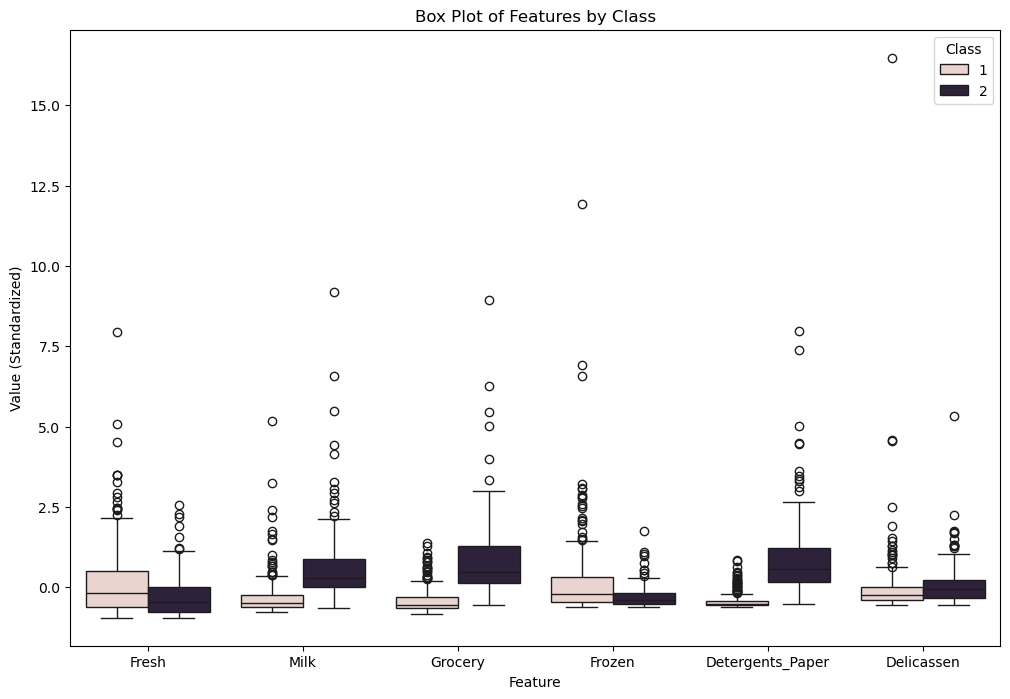

In [12]:
# Box plot: Distribution of each feature by class
plt.figure(figsize=(12, 8))
df_vis_melted = df_vis.melt(id_vars='Class', value_vars=numerical_columns, var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='Class', data=df_vis_melted)
plt.title('Box Plot of Features by Class')
plt.ylabel('Value (Standardized)')
plt.xlabel('Feature')
plt.legend(title='Class')
plt.show()


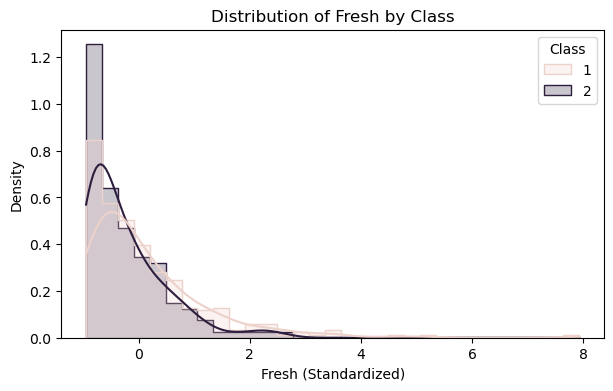

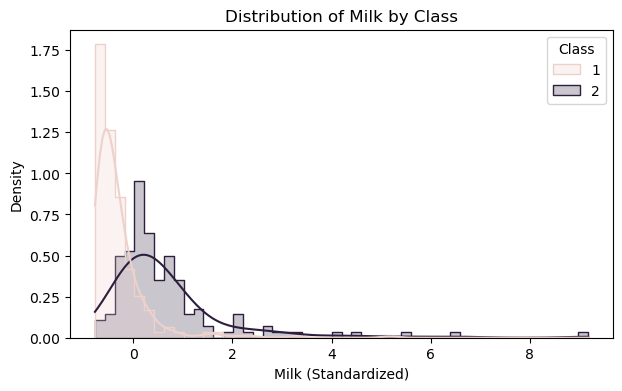

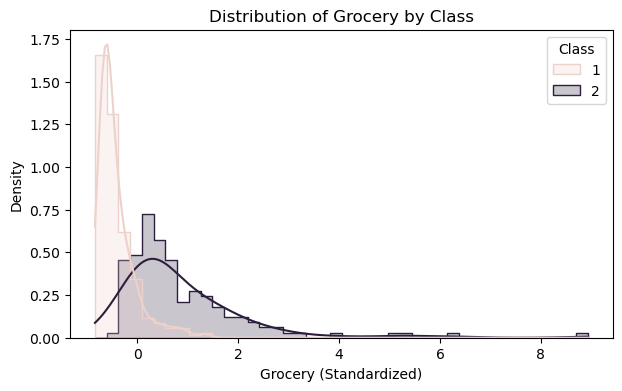

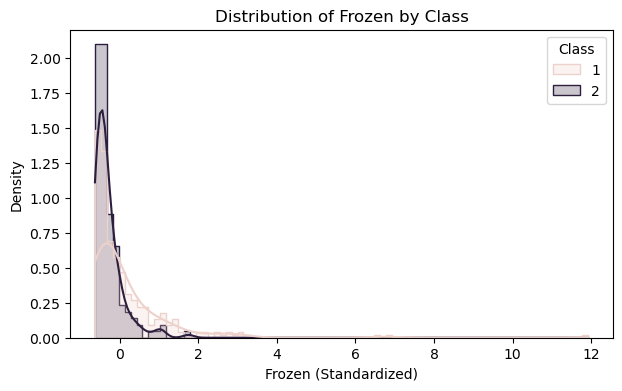

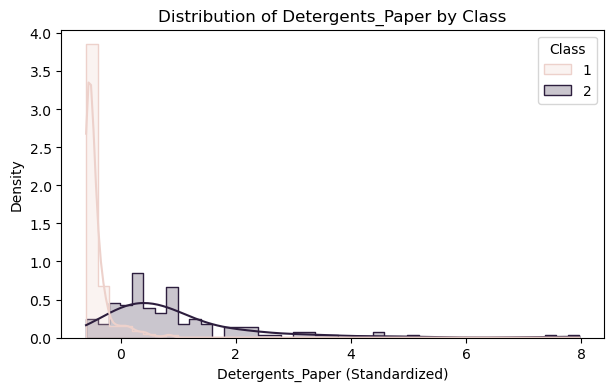

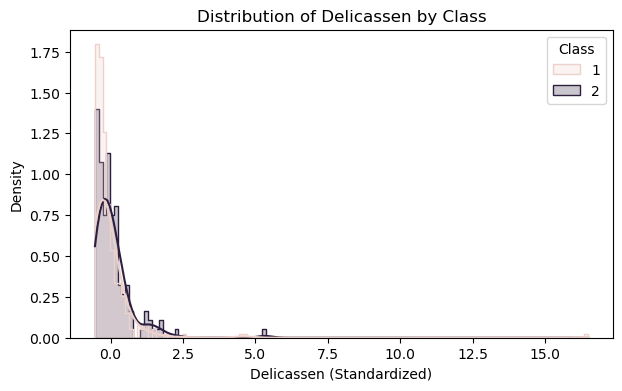

In [10]:
for col in numerical_columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df_vis, x=col, hue='Class', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {col} by Class')
    plt.xlabel(f'{col} (Standardized)')
    plt.ylabel('Density')
    plt.show()

# PCA

Explained Variance Ratio: [0.44082893 0.283764  ]
Total Explained Variance: 0.7245929240774497


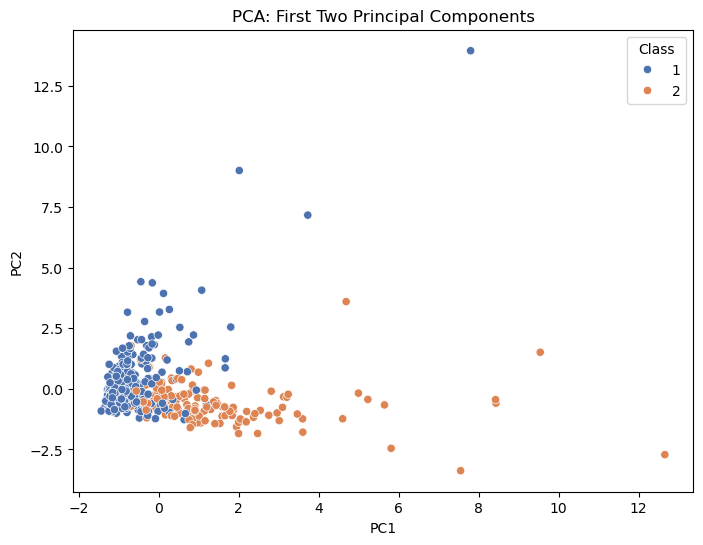

In [8]:
# Cell 4: PCA
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))

# Create DataFrame for PCA visualization
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Class'] = y

# Scatter plot of first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca, palette='deep')
plt.title('PCA: First Two Principal Components')
plt.show()